##                                    NO-SHOW APPOINTMENTS ANALYSIS

### Introduction

In this project, I'll be analysing a dataset of patients that miss their self-booked appointments. I'll be looking for trends among patients who missed their appointment and how they differed from those who didn't miss their appointments. 

The dataset has columns to identify the patients and the appointment day(**Patientid** and **Appointmentid** respectively), **Gender**, **ScheduledDay**(tells us on what day the patient set up their appointment), **AppointmentDay**(the day the patients shows up for consultation/treatment), **Age**, **Neighborhood**(which is the location of the hospital), **Scholarship**(which shows whether or not the patient is enrolled in Brasilian welfare program Bolsa Família), if the patients have terminal illnesses(**Hipertension** and **Diabetes**),**Handcap**, **alcoholism**, **SMS_received**, and **No-show**.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#### Data Wrangling

In [2]:
no_df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
no_df.head()

PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0             0      No  
2         0           0        0             0      No  
3         0           0        0             0      No  
4         1           0        0             0      No

In [3]:
no_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
sum(no_df.duplicated())

0

In [5]:
no_df.Gender.value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

In [6]:
no_df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [7]:
no_df['Age'].value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

In [8]:
no_df.describe()

PatientId  AppointmentID            Age    Scholarship  \
count  1.105270e+05   1.105270e+05  110527.000000  110527.000000   
mean   1.474963e+14   5.675305e+06      37.088874       0.098266   
std    2.560949e+14   7.129575e+04      23.110205       0.297675   
min    3.921784e+04   5.030230e+06      -1.000000       0.000000   
25%    4.172614e+12   5.640286e+06      18.000000       0.000000   
50%    3.173184e+13   5.680573e+06      37.000000       0.000000   
75%    9.439172e+13   5.725524e+06      55.000000       0.000000   
max    9.999816e+14   5.790484e+06     115.000000       1.000000   

        Hipertension       Diabetes     Alcoholism        Handcap  \
count  110527.000000  110527.000000  110527.000000  110527.000000   
mean        0.197246       0.071865       0.030400       0.022248   
std         0.397921       0.258265       0.171686       0.161543   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       4.000000   

        SMS_received  
count  110527.000000  
mean        0.321026  
std         0.466873  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         1.000000  
max         1.000000

The dataset contains 110527 non-null records with 14 variables.
Females are more than males and the mean age is 37 years.
There are 62299 unique values in PatientId column but I won't touch the duplicates because a patient can have multiple visits to the hospital.

### Data Cleaning


In [9]:
# correcting wrongly spelt headers
no_df.rename(columns = {'Hipertension' : 'Hypertensive', 'Handcap' : 'Handicap', 'Diabetes' : 'Diabetic','Alcoholism' : 'Alcoholic' }, inplace = True)

In [10]:
# making column headers consistent
no_df.rename(columns = lambda x: x.lower().replace("-", "_").strip(),inplace = True)
no_df.head(2)


patientid  appointmentid gender          scheduledday  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   

         appointmentday  age    neighbourhood  scholarship  hypertensive  \
0  2016-04-29T00:00:00Z   62  JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56  JARDIM DA PENHA            0             0   

   diabetic  alcoholic  handicap  sms_received no_show  
0         0          0         0             0      No  
1         0          0         0             0      No

In [11]:
#convert scheduledday and appointmentday from strings to datetime datatype
no_df.loc[:,['scheduledday', 'appointmentday']] = no_df.loc[:,['scheduledday', 'appointmentday']].apply(pd.to_datetime)
no_df.head(2)

patientid  appointmentid gender              scheduledday  \
0  2.987250e+13        5642903      F 2016-04-29 18:38:08+00:00   
1  5.589978e+14        5642503      M 2016-04-29 16:08:27+00:00   

             appointmentday  age    neighbourhood  scholarship  hypertensive  \
0 2016-04-29 00:00:00+00:00   62  JARDIM DA PENHA            0             1   
1 2016-04-29 00:00:00+00:00   56  JARDIM DA PENHA            0             0   

   diabetic  alcoholic  handicap  sms_received no_show  
0         0          0         0             0      No  
1         0          0         0             0      No

In [12]:
# Change the age of -1 to 1. I'm guessing that to be a typo error
no_df['age'].replace(-1, 1, inplace = True)

print(no_df['age'].value_counts()) #confirming the change has been made

0      3539
1      2274
52     1746
49     1652
53     1651
       ... 
98        6
115       5
100       4
102       2
99        1
Name: age, Length: 103, dtype: int64


## Research Questions

 1. What is the percentage of patients that did not show up for their appointments?
 
 2. Which neighbourhood has the highest number of missed appointment?
 
 3. What is the proportion of patients with scholarship that missed their appointment?
 
 4. Is there any difference in the age distribution of patients that missed their appointments to those who didn't?

#### Exploratory Data Analysis

#### 1. What is the percentage of patients that did not show up for their appointments?

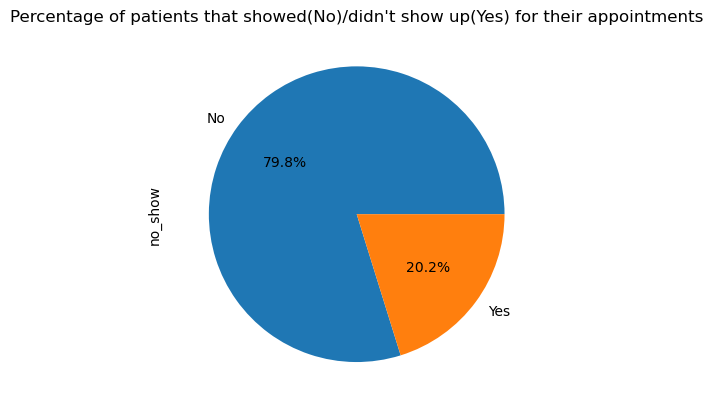

In [13]:
no_df['no_show'].value_counts().plot(kind = 'pie', title = "Percentage of patients that showed(No)/didn't show up(Yes) for their appointments", autopct='%1.1f%%');


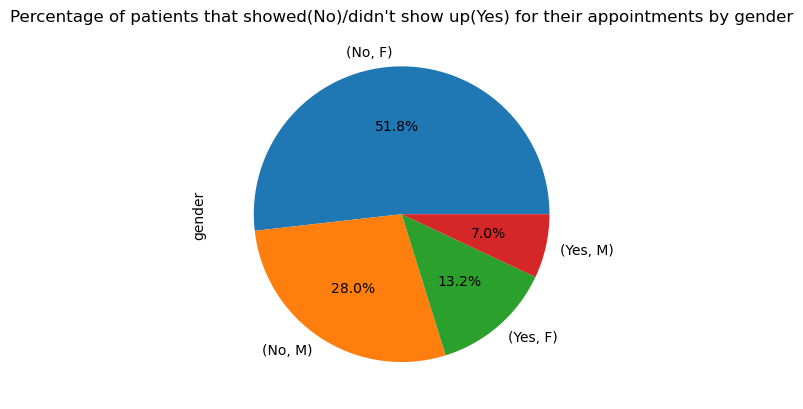

In [14]:
no_df.groupby('no_show').gender.value_counts().plot(kind = 'pie',title = "Percentage of patients that showed(No)/didn't show up(Yes) for their appointments by gender", autopct='%1.1f%%');

It seems a great percentage of patients keep to their appointments and the female class do better than the male class. But even with the 20.2% of patients that miss their appointments, females still have a higher percentage. This could be as a result of the female class being more than the male in the dataset.  let's explore more on the percentage of patients that didn't show up for their appointments to see what they have in common.

In [15]:
# creating a dataFrame of patients that missed their appointments before going into the analysis
missed_df = no_df.query('no_show == "Yes"')
missed_df.head()

patientid  appointmentid gender              scheduledday  \
6   7.336882e+14        5630279      F 2016-04-27 15:05:12+00:00   
7   3.449833e+12        5630575      F 2016-04-27 15:39:58+00:00   
11  7.542951e+12        5620163      M 2016-04-26 08:44:12+00:00   
17  1.479497e+13        5633460      F 2016-04-28 09:28:57+00:00   
20  6.222575e+14        5626083      F 2016-04-27 07:51:14+00:00   

              appointmentday  age   neighbourhood  scholarship  hypertensive  \
6  2016-04-29 00:00:00+00:00   23      GOIABEIRAS            0             0   
7  2016-04-29 00:00:00+00:00   39      GOIABEIRAS            0             0   
11 2016-04-29 00:00:00+00:00   29  NOVA PALESTINA            0             0   
17 2016-04-29 00:00:00+00:00   40       CONQUISTA            1             0   
20 2016-04-29 00:00:00+00:00   30  NOVA PALESTINA            0             0   

    diabetic  alcoholic  handicap  sms_received no_show  
6          0          0         0             0     Yes  
7          0          0         0             0     Yes  
11         0          0         0             1     Yes  
17         0          0         0             0     Yes  
20         0          0         0             0     Yes

In [16]:
missed_df.shape

(22319, 14)

In [18]:
meet_df = no_df.query('no_show == "No"')
meet_df.head()

patientid  appointmentid gender              scheduledday  \
0  2.987250e+13        5642903      F 2016-04-29 18:38:08+00:00   
1  5.589978e+14        5642503      M 2016-04-29 16:08:27+00:00   
2  4.262962e+12        5642549      F 2016-04-29 16:19:04+00:00   
3  8.679512e+11        5642828      F 2016-04-29 17:29:31+00:00   
4  8.841186e+12        5642494      F 2016-04-29 16:07:23+00:00   

             appointmentday  age      neighbourhood  scholarship  \
0 2016-04-29 00:00:00+00:00   62    JARDIM DA PENHA            0   
1 2016-04-29 00:00:00+00:00   56    JARDIM DA PENHA            0   
2 2016-04-29 00:00:00+00:00   62      MATA DA PRAIA            0   
3 2016-04-29 00:00:00+00:00    8  PONTAL DE CAMBURI            0   
4 2016-04-29 00:00:00+00:00   56    JARDIM DA PENHA            0   

   hypertensive  diabetic  alcoholic  handicap  sms_received no_show  
0             1         0          0         0             0      No  
1             0         0          0         0             0      No  
2             0         0          0         0             0      No  
3             0         0          0         0             0      No  
4             1         1          0         0             0      No

#### 2. Which neighbourhood has the highest number of missed appointment?

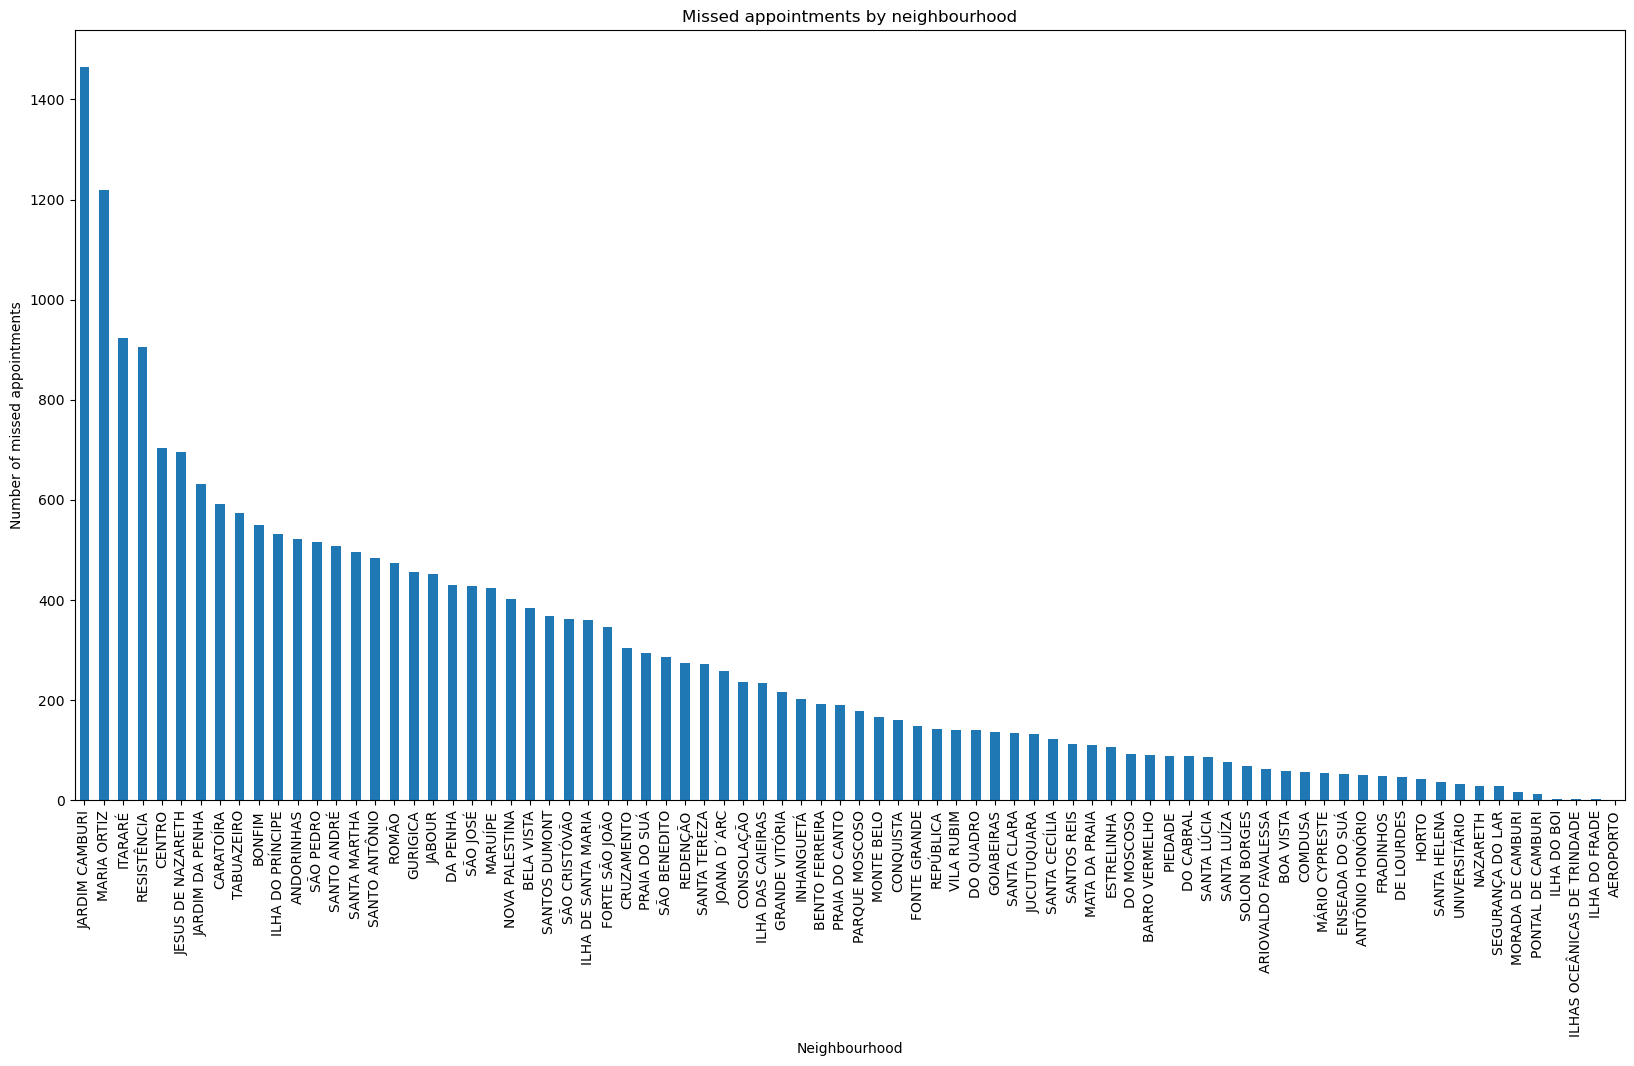

In [19]:
missed_df['neighbourhood'].value_counts().plot(kind = 'bar', figsize = (20,10))
plt.xlabel('Neighbourhood')
plt.ylabel('Number of missed appointments')
plt.title('Missed appointments by neighbourhood');

#### 3. What is the proportion of patients with scholarship that missed their appointment?

In [20]:
missed_scholarship = missed_df['scholarship'].value_counts()
missed_scholarship

0    19741
1     2578
Name: scholarship, dtype: int64

In [21]:
meet_scholarship = meet_df['scholarship'].value_counts()

In [22]:
total_scholarship = no_df['scholarship'].value_counts()

I took count of the scholarship colunms in the various df to help me get the proportion of patients in the question above.

In [23]:
missed_proportion = missed_scholarship[1] / total_scholarship[1]
missed_proportion

0.2373630420771568

In [24]:
meet_proportion = meet_scholarship[1] / total_scholarship[1]
meet_proportion

0.7626369579228433

#### 4. Is there any difference in the age distribution of patients that missed their appointments to those who didn't?

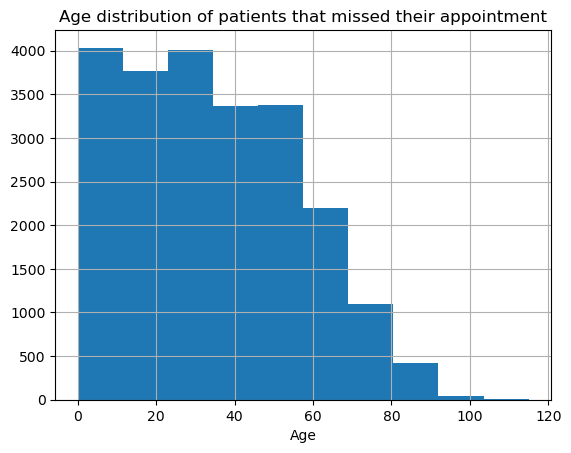

In [25]:
missed_df['age'].hist()
plt.xlabel('Age')
plt.title('Age distribution of patients that missed their appointment');

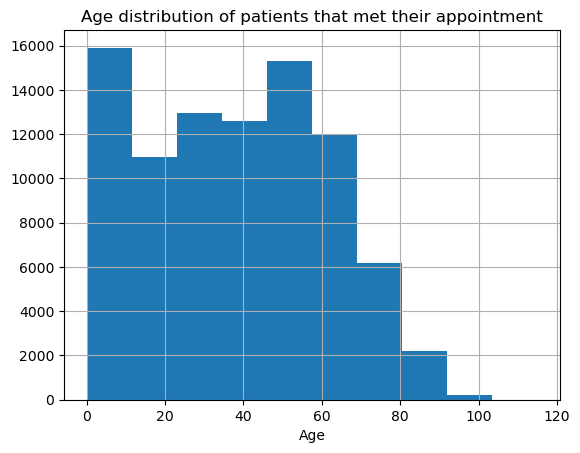

In [26]:
meet_df['age'].hist()
plt.xlabel('Age')
plt.title('Age distribution of patients that met their appointment');

In [33]:
# Let's check if there is any correlation between age and other colunms among patients that missed their appointments
missed_df.corr().style.background_gradient(cmap='Greens')

There is a moderate correlation (0.52) between age and hypertensive patients amongst patients that missed their appointment. is it the same for those that met their appointments?

In [34]:
meet_df.corr().style.background_gradient(cmap='Greens')

There is a weak correlation among these patients.

### Conclusion

From this analysis, I found that

1. The percentage of patients that did not show up for their appointment is 20.2% with females having a higher fraction of 13.2%.

2. Jardim Camburi neighbourhood had the highest number of missed appointments.

3. The proportion of patients with bolsa Familia that missed their appointments was about 0.24.

4. The age distribution of adult patients who missed their appointments maxed between 20 to 40 years while those that met their appointment maxed between 40 to 60 years and there is a moderate positive correlation between age and hypertensive patients that missed their appointments. 

#### Limitation

since the _neighbourhood_ column indicates the location of the hospital, I think there's need for a column that gives the _patient's address_. That way, we could check if distance from the hospital is a factor that makes patients to miss their appointments. 

Reference

1. [datagy article on Pandas to_datatime](https://datagy.io/pandas-to-datetime/)
2. [w3 schools: Matplotlib pie charts](https://www.w3schools.com/python/matplotlib_pie_charts.asp)
3. Pandas Documentation
4. Udacity Data Analysis process(casa study 2)